In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(30,15)})
pd.pandas.set_option("display.max_columns",None)



In [136]:
df = pd.read_csv('C:/Users/himanshu/ml project code/jupyter books/ml_assignment_code/ObesityDataSet_raw_and_data_sinthetic.csv')
df_copy = df.copy()

In [137]:
df_copy

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [138]:
df_copy.shape

(2111, 17)

In [139]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [140]:
df_copy.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [141]:
df_copy.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [142]:
df_copy.duplicated().sum()

24

In [143]:
df_copy = df_copy.drop_duplicates()

In [144]:
df_copy.shape

(2087, 17)

In [145]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df_copy[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df_copy.columns if feature not in numerical_feature]

In [127]:
numerical_feature

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [146]:
categorical_feature

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [147]:
discrete_feature

[]

In [148]:
continuous_feature

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [149]:
for i in categorical_feature:
    print(i)
    print(df_copy[i].unique())
    print('*'*100)

Gender
['Female' 'Male']
****************************************************************************************************
family_history_with_overweight
['yes' 'no']
****************************************************************************************************
FAVC
['no' 'yes']
****************************************************************************************************
CAEC
['Sometimes' 'Frequently' 'Always' 'no']
****************************************************************************************************
SMOKE
['no' 'yes']
****************************************************************************************************
SCC
['no' 'yes']
****************************************************************************************************
CALC
['no' 'Sometimes' 'Frequently' 'Always']
****************************************************************************************************
MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
***

In [150]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [1]:
try:
          plt.suptitle("Distribution of numerical features")
          for i in range(0,len(continuous_feature)):
                    plt.subplot(3,4,i+1)
                    sns.histplot(x=df_copy[continuous_feature[i]],kde=True)
                    plt.tight_layout()
except Exception as e:
          print(e)

name 'plt' is not defined


In [152]:

gender_map = {'Female':0,'Male':1}
family_history_with_overweight_map = {'no':0,'yes':1}
FAVC_map = {'no':0,'yes':1}
SMOKE_map = {'no':0,'yes':1}
SCC_map = {'no':0,'yes':1}
CAEC_map = {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}
CALC_map = {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}
MTRANS_map = {'Public_Transportation':0, 'Walking':1, 'Automobile':2, 'Motorbike':3, 'Bike':4}
NObeyesdad_map = {'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2,
 'Obesity_Type_I':3, 'Insufficient_Weight':4, 'Obesity_Type_II':5,
 'Obesity_Type_III':6}

df_copy['Gender'] = df_copy['Gender'].map(gender_map)
df_copy['family_history_with_overweight'] = df_copy['family_history_with_overweight'].map(family_history_with_overweight_map)
df_copy['FAVC'] = df_copy['FAVC'].map(FAVC_map)
df_copy['SMOKE'] = df_copy['SMOKE'].map(SMOKE_map)
df_copy['SCC'] = df_copy['SCC'].map(SCC_map)
df_copy['CAEC'] = df_copy['CAEC'].map(CAEC_map)
df_copy['CALC'] = df_copy['CALC'].map(CALC_map)
df_copy['MTRANS'] = df_copy['MTRANS'].map(MTRANS_map)
df_copy['NObeyesdad'] = df_copy['NObeyesdad'].map(NObeyesdad_map)



C:\Users\himanshu\AppData\Local\Temp\ipykernel_9932\2646586873.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Gender'] = df_copy['Gender'].map(gender_map)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_9932\2646586873.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['family_history_with_overweight'] = df_copy['family_history_with_overweight'].map(family_history_with_overweight_map)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_9932\2646586873.py:15: SettingWithCopyWarning: 
A val

In [2]:
for feature in continuous_feature:
    sns.boxplot(df_copy[feature])
    plt.title(feature)
    plt.figure(figsize=(12,10))

NameError: name 'continuous_feature' is not defined

In [103]:
df_copy['Age'] = df_copy['Age'].astype(int)

In [154]:
IQR = df_copy['Age'].quantile(0.75) - df_copy['Age'].quantile(0.25)

# Determine the outlier boundaries
lower_bound = df_copy['Age'].quantile(0.25) - (1.5 * IQR)
print(lower_bound,'lower_bound')
upper_bound = df_copy['Age'].quantile(0.75) + (1.5 * IQR)
print(upper_bound,'upper_bound')

# Identify the outliers
outliers = df_copy[(df_copy['Age'] < lower_bound) | (df_copy['Age'] > upper_bound)]


10.789843749999996 lower_bound
35.12609375 upper_bound


In [155]:
outliers

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
13,1,41.000000,1.800000,99.000000,0,1,2.000000,3.000000,1,0,2.000000,0,2.000000,1.00000,2,2,3
21,0,52.000000,1.690000,87.000000,1,1,3.000000,1.000000,1,1,2.000000,0,0.000000,0.00000,0,2,3
33,1,39.000000,1.790000,90.000000,0,0,2.000000,1.000000,1,0,2.000000,0,0.000000,0.00000,1,0,2
92,1,55.000000,1.780000,84.000000,1,0,3.000000,4.000000,2,0,3.000000,1,3.000000,0.00000,2,1,1
104,0,38.000000,1.560000,80.000000,1,1,2.000000,3.000000,1,0,2.000000,0,0.000000,0.00000,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,1,37.765356,1.763582,117.861590,1,1,2.145114,2.888193,1,0,2.038128,0,0.852344,0.00000,1,2,5
1775,1,37.207082,1.762921,118.401740,1,1,2.136830,2.993084,1,0,1.885926,0,0.615298,0.00000,1,2,5
1776,1,38.108940,1.752863,119.201465,1,1,2.499388,2.989791,1,0,1.959777,0,0.608100,0.64676,1,2,5
1777,1,38.644441,1.768235,117.792268,1,1,2.230742,2.920373,1,0,1.831187,0,0.756277,0.00000,1,2,5


In [156]:
IQR = df_copy['NCP'].quantile(0.75) - df_copy['NCP'].quantile(0.25)

# Determine the outlier boundaries
lower_bound = df_copy['NCP'].quantile(0.25) - (1.5 * IQR)
print(lower_bound,'lower_bound')
upper_bound = df_copy['NCP'].quantile(0.75) + (1.5 * IQR)
print(upper_bound,'upper_bound')

# Identify the outliers
outliers = df_copy[(df_copy['NCP'] < lower_bound) | (df_copy['NCP'] > upper_bound)]

2.2436675 lower_bound
3.4537994999999997 upper_bound


In [157]:
outliers

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
4,1,22.000000,1.780000,89.800000,0,0,2.000000,1.000000,1,0,2.000000,0,0.000000,0.000000,1,0,2
14,1,23.000000,1.770000,60.000000,1,1,3.000000,1.000000,1,0,1.000000,0,1.000000,1.000000,1,0,0
16,1,27.000000,1.930000,102.000000,1,1,2.000000,1.000000,1,0,1.000000,0,1.000000,0.000000,1,0,2
17,0,29.000000,1.530000,78.000000,0,1,2.000000,1.000000,1,0,2.000000,0,0.000000,0.000000,0,2,3
18,0,30.000000,1.710000,82.000000,1,1,3.000000,4.000000,2,1,1.000000,0,0.000000,0.000000,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,1,30.642430,1.653876,102.583895,1,1,2.919526,2.142328,1,0,1.175714,0,0.958555,0.636289,0,0,5
1795,1,20.068432,1.657132,105.580491,1,1,2.724121,1.437959,1,0,1.590418,0,0.029603,1.122118,0,0,5
1796,1,20.914366,1.644751,101.067988,1,1,2.801992,1.343117,1,0,1.128942,0,0.233987,0.819980,0,0,5
1797,1,25.512048,1.660761,104.321463,1,1,2.748971,1.213431,1,0,1.448875,0,0.128548,1.239038,0,0,5


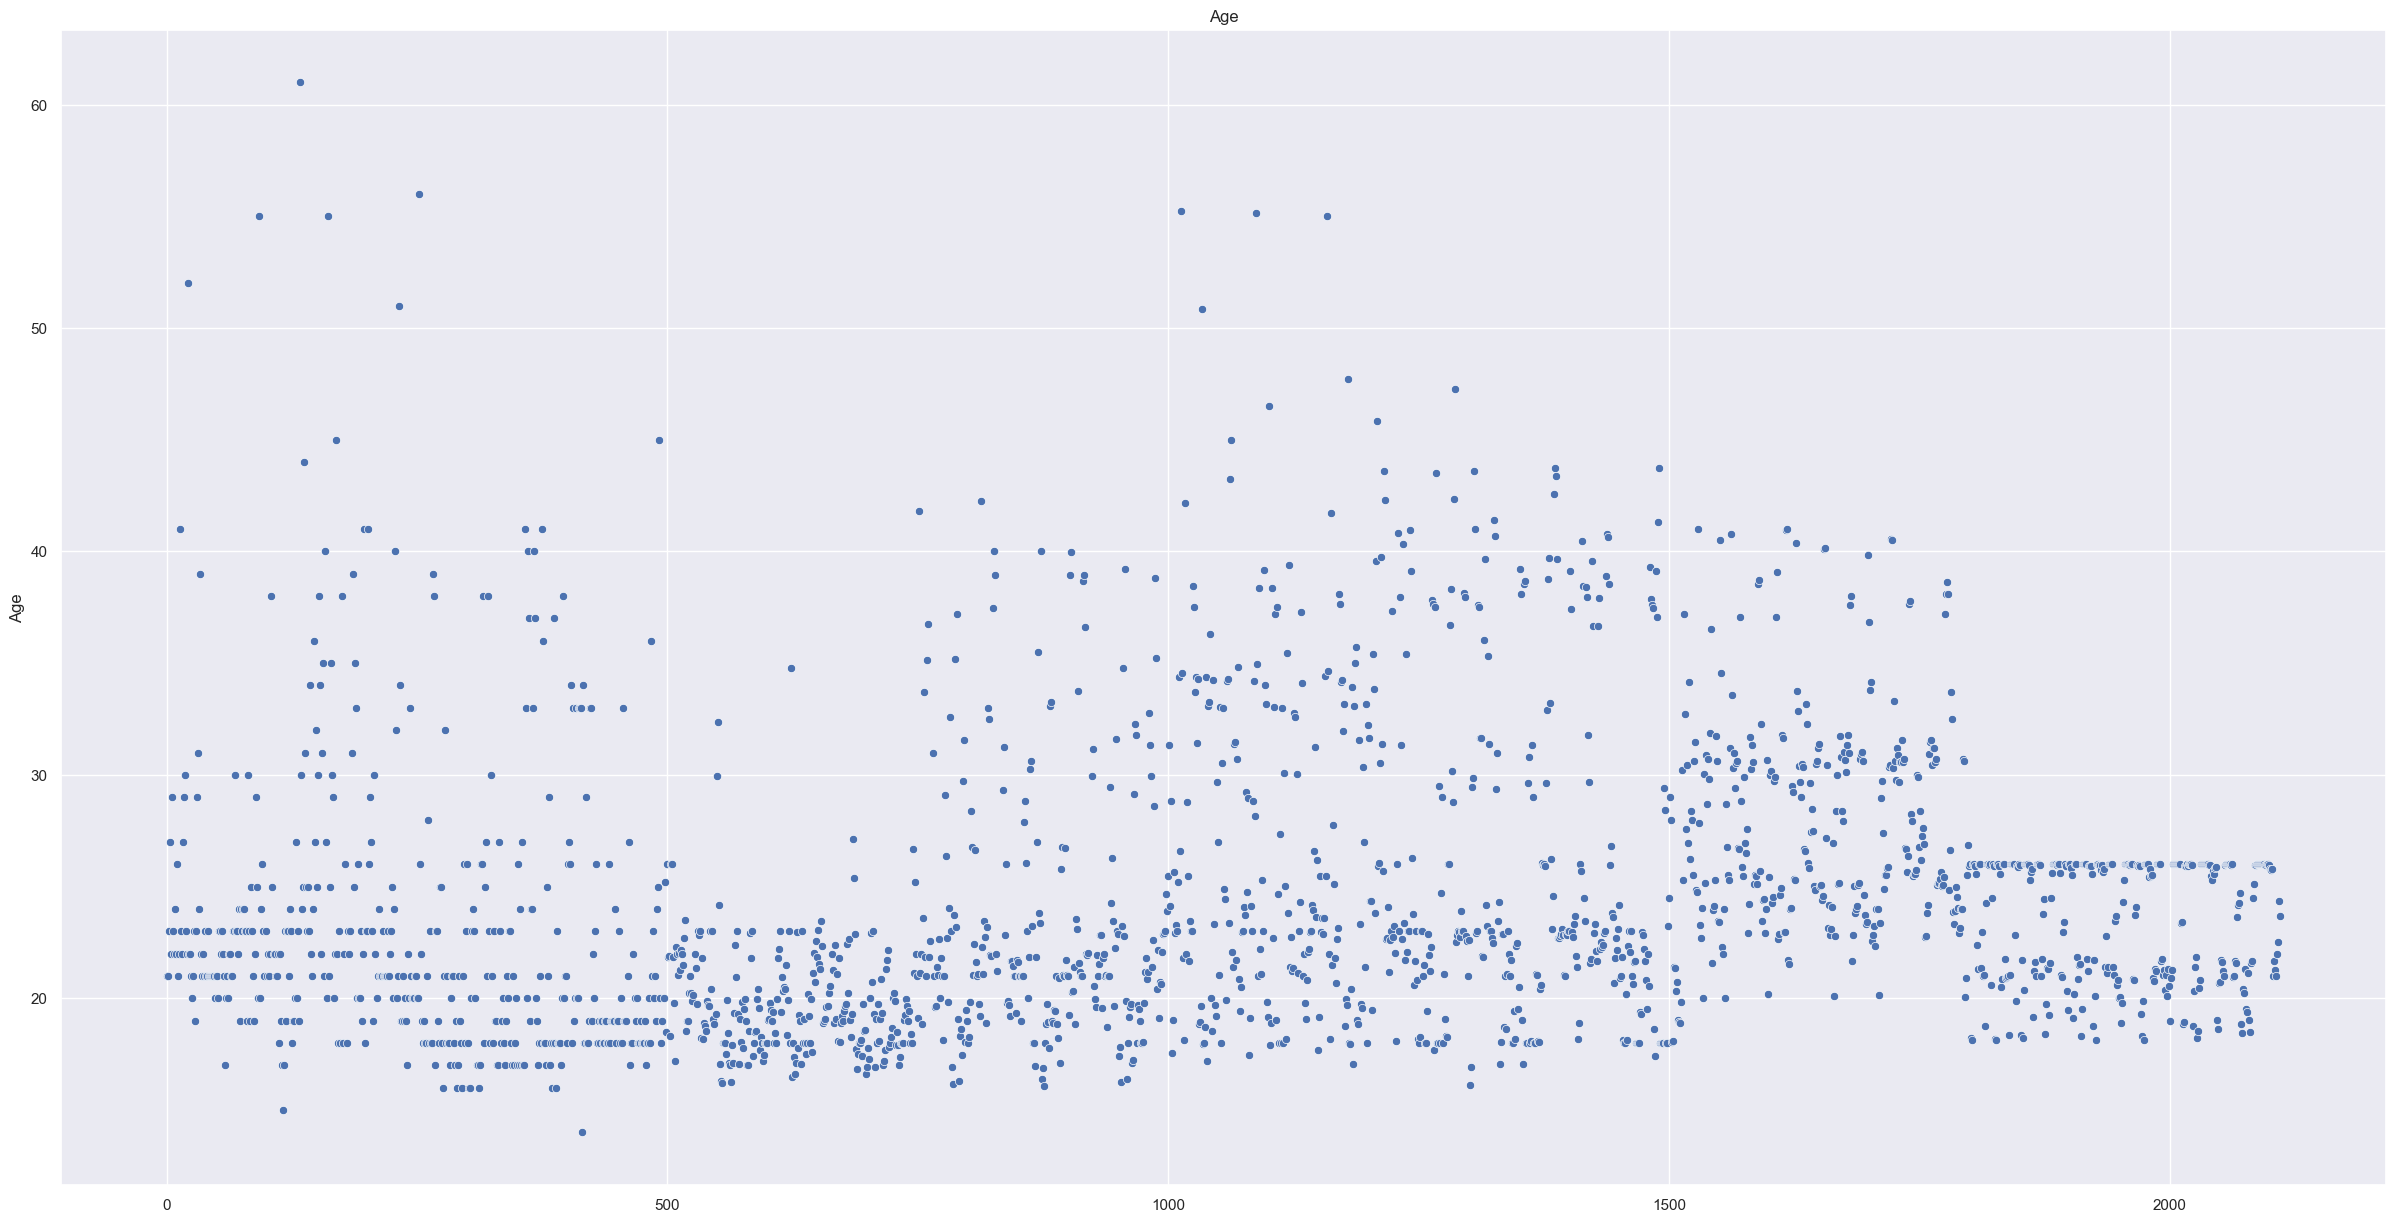

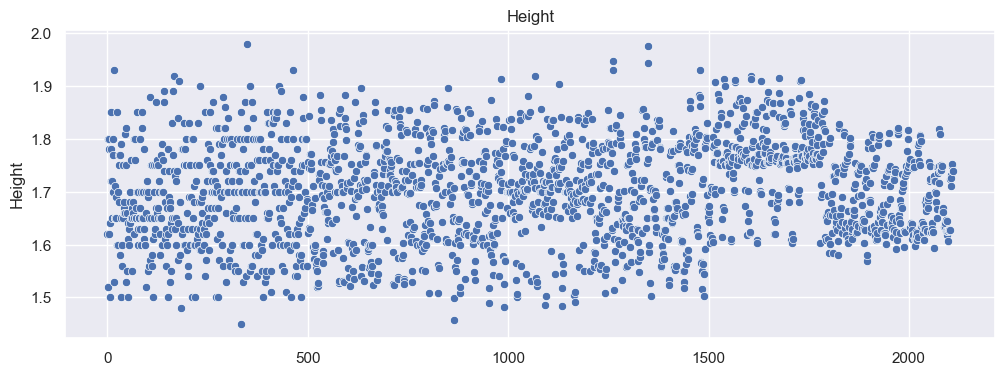

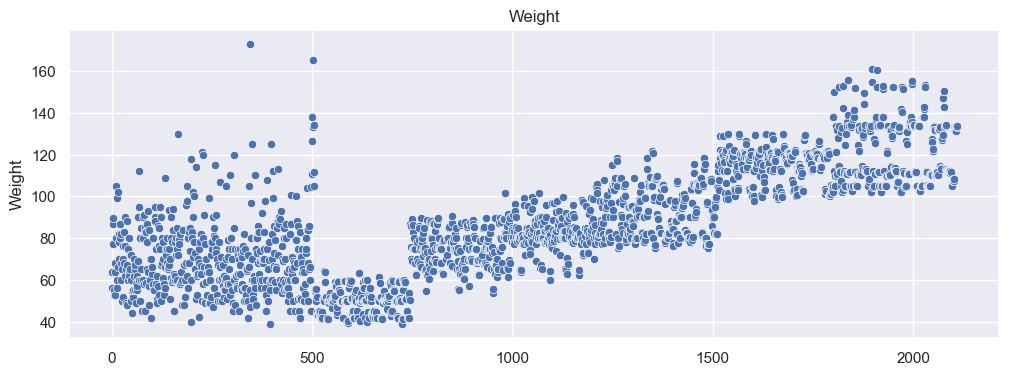

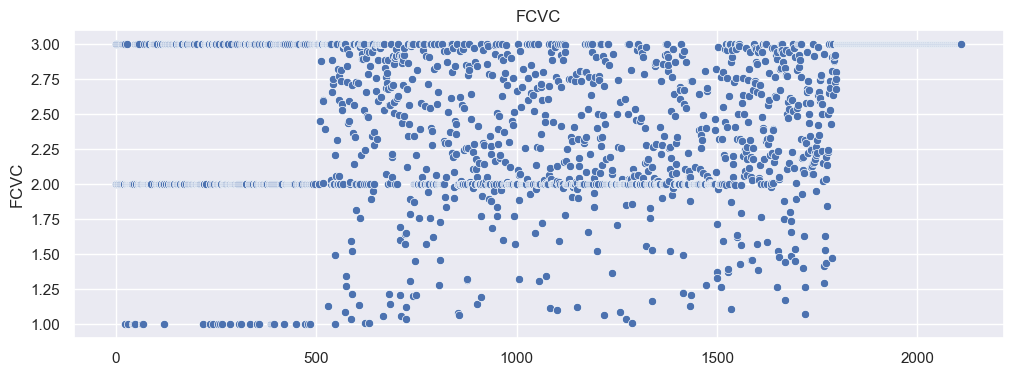

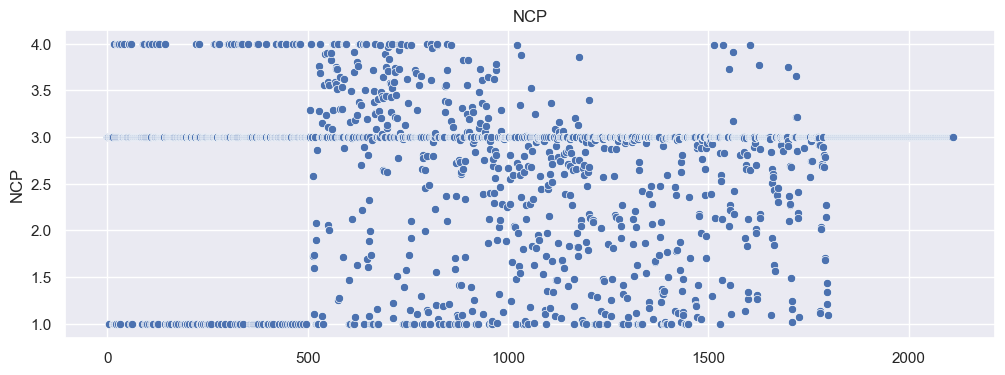

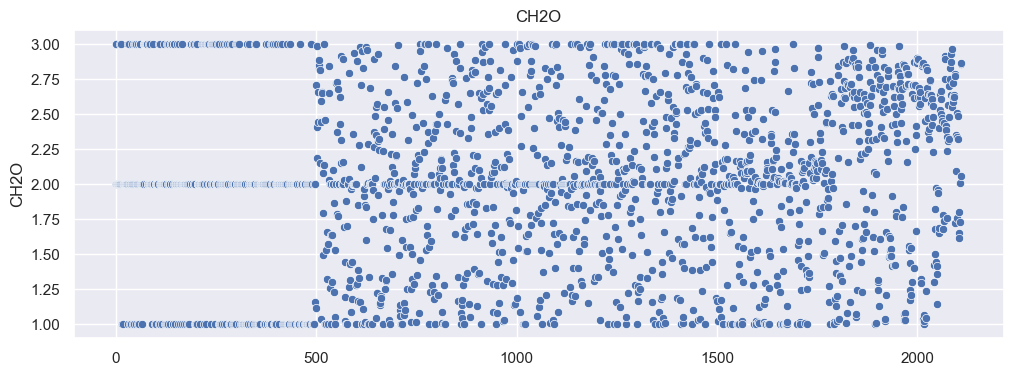

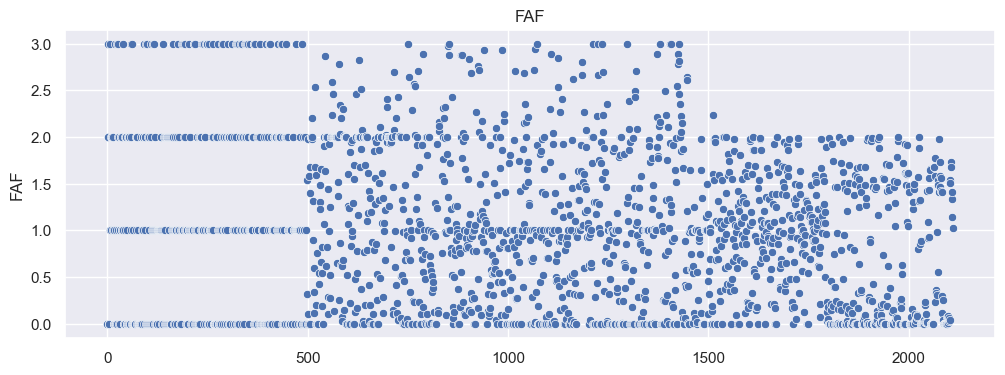

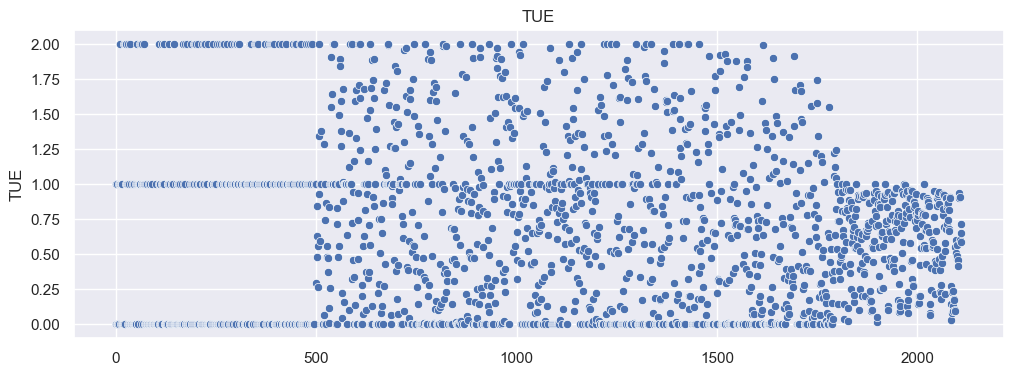

<Figure size 1200x400 with 0 Axes>

In [158]:
for feature in continuous_feature:
    sns.scatterplot(df_copy[feature])
    plt.title(feature)
    plt.figure(figsize=(12,4))

In [82]:
# there is no such pattern in numerical data

In [86]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          0 non-null      float64
 1   Age                             2111 non-null   int32  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  0 non-null      float64
 5   FAVC                            0 non-null      float64
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            0 non-null      float64
 9   SMOKE                           0 non-null      float64
 10  CH2O                            2111 non-null   float64
 11  SCC                             0 non-null      float64
 12  FAF                             21

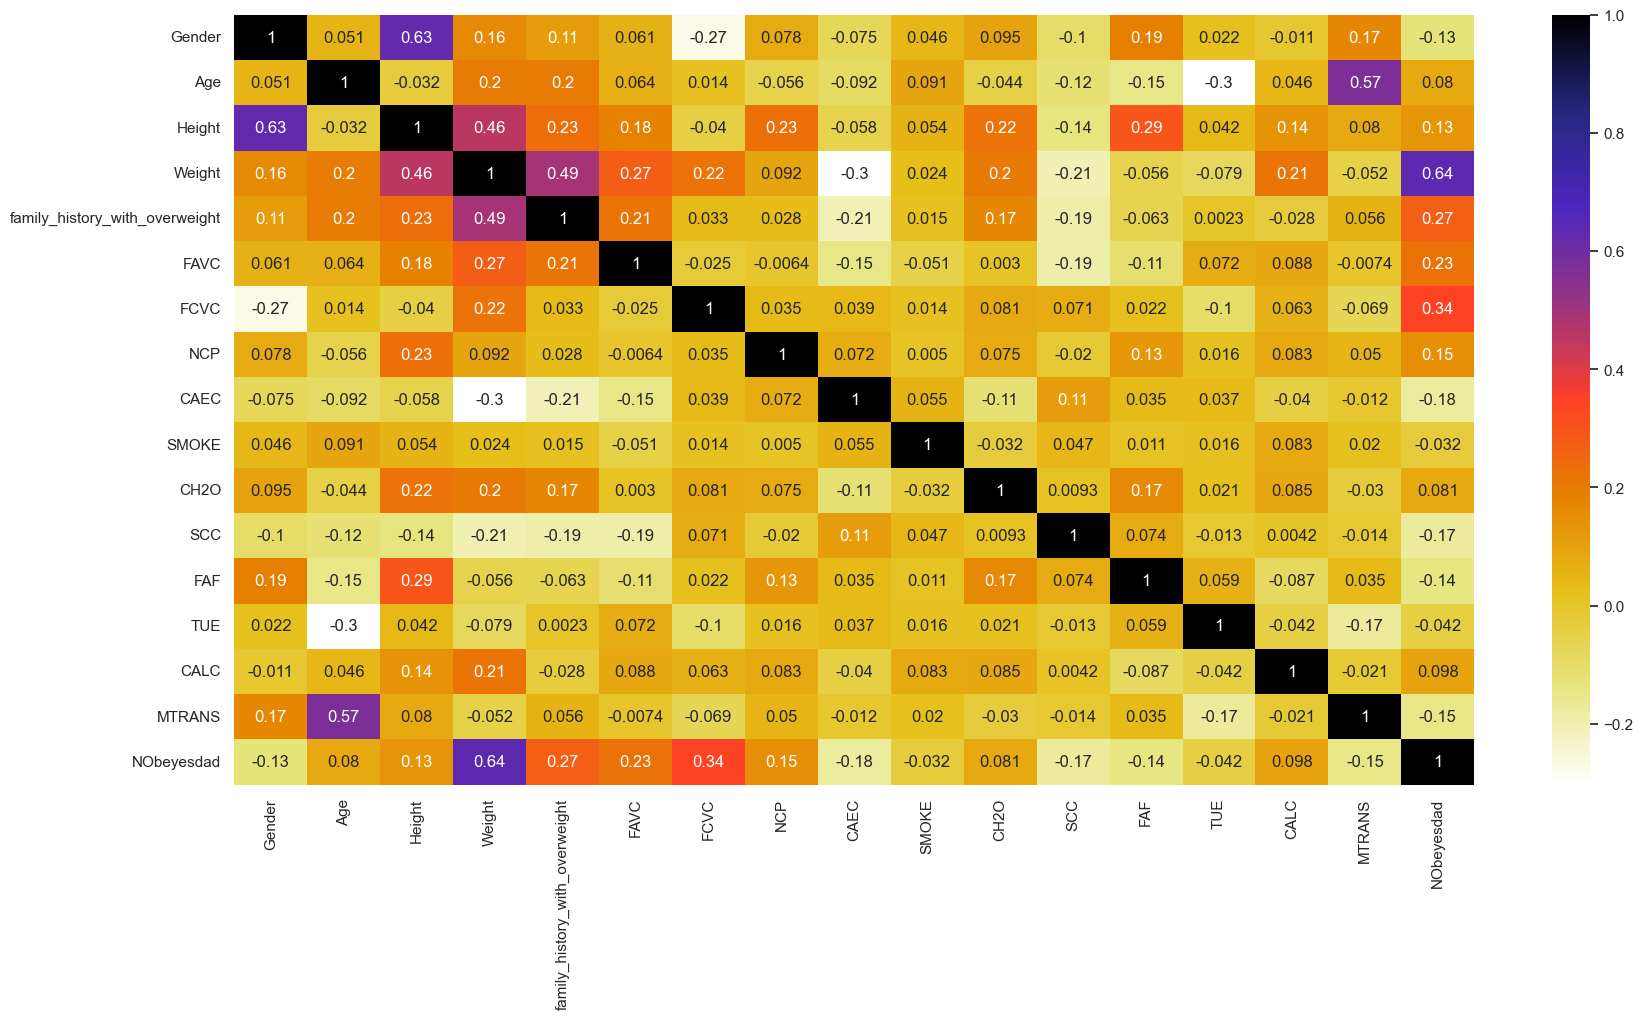

In [159]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df_copy.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()